In [1]:
import os
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data_folder = os.path.join('..','data')
jan_file = os.path.join(data_folder, 'yellow_tripdata_2023-01.parquet')
feb_file = os.path.join(data_folder, 'yellow_tripdata_2023-02.parquet')

In [3]:
df = pd.read_parquet(jan_file)

In [4]:
# Q1. Downloading the data. How many columns are in January file?

df.shape[1]

19

In [5]:
# Q2. Standard deviation of the trips duration in January

df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60
round(df.describe()['duration']['std'], 2)

42.59

In [6]:
# Q3. What fraction of records left after dropping the outliers?

full_shape = df.shape[0]
df_wo_outliers = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
dropped_outliers_shape = df_wo_outliers.shape[0]
fraction_of_records_left = dropped_outliers_shape/full_shape
round(fraction_of_records_left,2)

0.98

In [8]:
# Q4. One-hot encoding. What's dimensionality of matrix after applying OHE to pickup and dropoff location IDs?
categorical = ['PULocationID', 'DOLocationID']
df_wo_outliers[categorical] = df_wo_outliers[categorical].astype(str)

dv = DictVectorizer()
train_dicts = df_wo_outliers[categorical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)
X_train.shape[1]

/tmp/ipykernel_11514/1027284247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_outliers[categorical] = df_wo_outliers[categorical].astype(str)


515

In [9]:
# Q5. Train a linear regression model with default parameters. What's the RMSE on training data?
target = 'duration'
y_train = df_wo_outliers['duration'].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

round(mean_squared_error(y_train, y_pred, squared = False), 2)

7.65

In [10]:
# Q6. Evaluate the model on february 2023 data
df_val = pd.read_parquet(feb_file)
df_val['duration'] = (df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']).dt.total_seconds()/60
df_val_wo_outliers = df_val[(df_val['duration'] >= 1) & (df_val['duration'] <= 60)]

categorical = ['PULocationID', 'DOLocationID']
test_dicts = df_val_wo_outliers[categorical].astype(str).to_dict(orient = 'records')

X_test = dv.transform(test_dicts)
y_test = df_val_wo_outliers['duration'].values
y_pred_test = lr.predict(X_test)

In [12]:
mean_squared_error(y_pred_test, y_test, squared = False)

7.811832641626525

<AxesSubplot:ylabel='Count'>

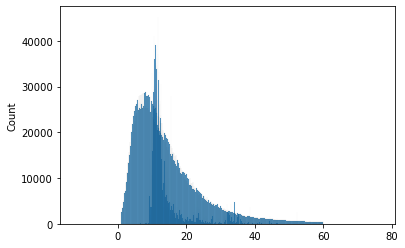

In [13]:
sns.histplot(y_pred_test, label='prediction')
sns.histplot(y_test, label='actual')